Exercise 5

In [1]:
from langgraph.graph import StateGraph, END
import random
from typing import Dict, List, TypedDict

In [2]:
class GameState(TypedDict):
    player_name: str
    target_number: int
    guesses: List[int]
    attempts: int
    hint: str
    lower_bound: int
    upper_bound: int

In [3]:
def setup_node(state: GameState) -> GameState:
    state["player_name"] = f"Welcome, {state['player_name']}!"
    state["target_number"] = random.randint(1, 20)
    state["guesses"] = []
    state["attempts"] = 0
    state["hint"] = "Game started! Try to guess the number."
    state["lower_bound"] = 1
    state["upper_bound"] = 20
    print(
        f"{state['player_name']} The game has begun. I'm thinking of a number between 1 and 20."
    )
    return state

In [4]:
def guess_node(state: GameState) -> GameState:
    possible_guesses = [
        i
        for i in range(state["lower_bound"], state["upper_bound"] + 1)
        if i not in state["guesses"]
    ]
    if possible_guesses:
        guess = random.choice(possible_guesses)
    else:
        guess = random.randint(state["lower_bound"], state["upper_bound"])

    state["guesses"].append(guess)
    state["attempts"] += 1
    print(
        f"Attempt {state['attempts']}: Guessing {guess} (Current range: {state['lower_bound']}-{state['upper_bound']})"
    )
    return state

In [5]:
def hint_node(state: GameState) -> GameState:
    latest_guess = state["guesses"][-1]
    target = state["target_number"]

    if latest_guess < target:
        state["hint"] = f"The number {latest_guess} is too low. Try higher!"
        state["lower_bound"] = max(state["lower_bound"], latest_guess + 1)
        print(f"Hint: {state['hint']}")
    elif latest_guess > target:
        state["hint"] = f"The number {latest_guess} is too high. Try lower!"
        state["upper_bound"] = min(state["upper_bound"], latest_guess - 1)
        print(f"Hint: {state['hint']}")
    else:
        state["hint"] = (
            f"Correct! You found the number {target} in {state['attempts']} attempts."
        )
        print(f"Success! {state['hint']}")

    return state

In [6]:
def should_continue(state: GameState) -> str:
    latest_guess = state["guesses"][-1]
    
    if latest_guess == state["target_number"]:
        print(f"GAME OVER: Number found!")
        return "end"
    elif state["attempts"] >= 7:
        print(
            f"GAME OVER: Maximum attempts reached! The number was {state['target_number']}"
        )
        return "end"
    else:
        print(f"CONTINUING: {state['attempts']}/7 attempts used")
        return "continue"

In [7]:
graph = StateGraph(GameState)
graph.add_node("setup", setup_node)
graph.add_node("guess", guess_node)
graph.add_node("hint_node", hint_node)

graph.add_edge("setup", "guess")
graph.add_edge("guess", "hint_node")
graph.add_conditional_edges(
    "hint_node", should_continue, {"continue": "guess", "end": END}
)

graph.set_entry_point("setup")
app = graph.compile()

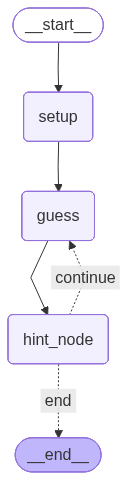

In [8]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [9]:
result = app.invoke(
    {
        "player_name": "Student",
        "guesses": [],
        "attempts": 0,
        "lower_bound": 1,
        "upper_bound": 20,
    }
)

Welcome, Student! The game has begun. I'm thinking of a number between 1 and 20.
Attempt 1: Guessing 18 (Current range: 1-20)
Hint: The number 18 is too low. Try higher!
CONTINUING: 1/7 attempts used
Attempt 2: Guessing 19 (Current range: 19-20)
Hint: The number 19 is too low. Try higher!
CONTINUING: 2/7 attempts used
Attempt 3: Guessing 20 (Current range: 20-20)
Success! Correct! You found the number 20 in 3 attempts.
GAME OVER: Number found!
